## EDA: Movielens Dataset

## Exploratory Data Analysis (EDA)

In this notebook, we performed an exploratory data analysis (EDA) on the Movielens dataset. The dataset contains information about movies, including their titles, genres, release years, and user reviews.

### Data Import and Libraries

We started by importing the necessary libraries for our analysis, including `pandas`, `numpy`, `matplotlib`, `seaborn`, and `datetime`. These libraries provide us with the tools and functions needed to manipulate, visualize, and analyze the data.

### Data Loading

Next, we loaded the cleaned Movielens dataset from a parquet file. The dataset contains information about movies, including their titles, genres, release years, and user reviews.

### Data Exploration

We then explored the dataset to gain insights into its structure and content. We checked the shape and size of the dataset, the number of unique movies, and the columns of the dataframe. We also performed a basic description of the numerical variables in the dataset.

### Missing Values

We checked for missing values in the dataset and calculated the percentage of missing values for each column. Fortunately, there were no significant missing values in the dataset.

### Genre Analysis

We analyzed the genres of the movies by exploding the lists in the 'genres' column into separate rows. We then counted the number of unique genres and plotted the distribution of genres using count plots.

### Year Analysis

We analyzed the distribution of movies by release year. We counted the number of movies per year and plotted the count of movies per year using a bar chart.

### Review Analysis

We analyzed the user reviews in the dataset. We calculated the total number of reviews, the average number of reviews per movie, and the number of reviews per rating. We also plotted the count of ratings and the average rating per movie.

### Time Analysis

We analyzed the distribution of reviews over time. We extracted the year and month from the 'date' key of each review and plotted the count of ratings per year and month using a stacked bar chart.

### Conclusion

In conclusion, this EDA provided us with valuable insights into the Movielens dataset. We gained a better understanding of the movie genres, release years, user reviews, and the distribution of reviews over time. These insights will be useful for further analysis and modeling tasks, such as building a recommendation system based on user preferences and movie attributes.


In [1]:
# import the needed libraries for the EDA
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


We read the cleaned file for the Movielens, product of the file `joining.ipynb`.

In [2]:
# we read the Movielens cleaned data
# we set the directory to the cleaned folder
os.listdir(os.path.join('.', 'cleaned'))

['final_sample5_parquet', 'movielens_parquet', 'netflix_parquet']

After importing the needed libraries, we will start looking at the content of the Movielens reading the content into a pandas dataframe.

In [3]:
ML = pd.read_parquet('cleaned/movielens_parquet')

First of all we look into the shape and size of the data, to see how many different movies we have.

In [4]:
# we check the columns of the dataframe
print(ML.columns)

Index(['movieId', 'title', 'genres', 'year', 'review_data', 'imdbId',
       'tmdbId'],
      dtype='object')


In [5]:
# We print the shape of the dataframe and the number of unique movies
print(ML.shape)
print(ML['movieId'].nunique())

(9742, 7)
9742


We do a basic description of the numerical variables that we have in the dataset.

In [6]:
# We describe the dataframe
ML.describe()

,movieId,imdbId,tmdbId
count,9742.000000,9.742000e+03,9734.000000
mean,42200.353623,6.771839e+05,55162.123793
std,52160.494854,1.107228e+06,93653.481487
min,1.000000,4.170000e+02,2.000000
25%,3248.250000,9.518075e+04,9665.500000
50%,7300.000000,1.672605e+05,16529.000000
75%,76232.000000,8.055685e+05,44205.750000
max,193609.000000,8.391976e+06,525662.000000


We have to check if there are NaN values, and if their presence is relevant and means a big part of the dataset.

In [7]:
# We check if there are NaN values in the dataframe where we print the percentages of NaN values
def check_nan(df):
    nan_values = df.isna().sum()
    nan_values = nan_values[nan_values > 0]
    nan_values = nan_values / len(df)
    print(nan_values)

check_nan(ML)

year      0.001334
tmdbId    0.000821
dtype: float64


In [8]:
# We print the content of the dataframe
ML.head()

,movieId,title,genres,year,review_data,imdbId,tmdbId
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,"[{'date': 2000-07-30, 'rating': 4.0, 'tag': No...",114709,862.0
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,"[{'date': 1996-10-17, 'rating': 4.0, 'tag': No...",113497,8844.0
2,3,Grumpier Old Men,"[Comedy, Romance]",1995,"[{'date': 2000-07-30, 'rating': 4.0, 'tag': No...",113228,15602.0
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995,"[{'date': 1996-10-17, 'rating': 3.0, 'tag': No...",114885,31357.0
4,5,Father of the Bride Part II,[Comedy],1995,"[{'date': 1996-10-17, 'rating': 5.0, 'tag': No...",113041,11862.0


In [9]:
# We print the type of the columns
print(ML.dtypes)

movieId          int64
title           object
genres          object
year            object
review_data     object
imdbId           int64
tmdbId         float64
dtype: object


We will explode the genres, to see how many unique ones we have. Genres can be used in the modelling part to distinguish items and preferences more accuratelly.

In [10]:
# Explode the lists in the 'genres' column into separate rows
exploded_genres = ML.explode('genres')['genres']

# Get unique genres
unique_genres = exploded_genres.unique()

# Print unique genres
print(unique_genres)


['Adventure' 'Animation' 'Children' 'Comedy' 'Fantasy' 'Romance' 'Drama'
 'Action' 'Crime' 'Thriller' 'Horror' 'Mystery' 'Sci-Fi' 'War' 'Musical'
 'Documentary' 'IMAX' 'Western' 'Film-Noir' '(no genres listed)']


We plot the distribution of the genres using `count plots`.

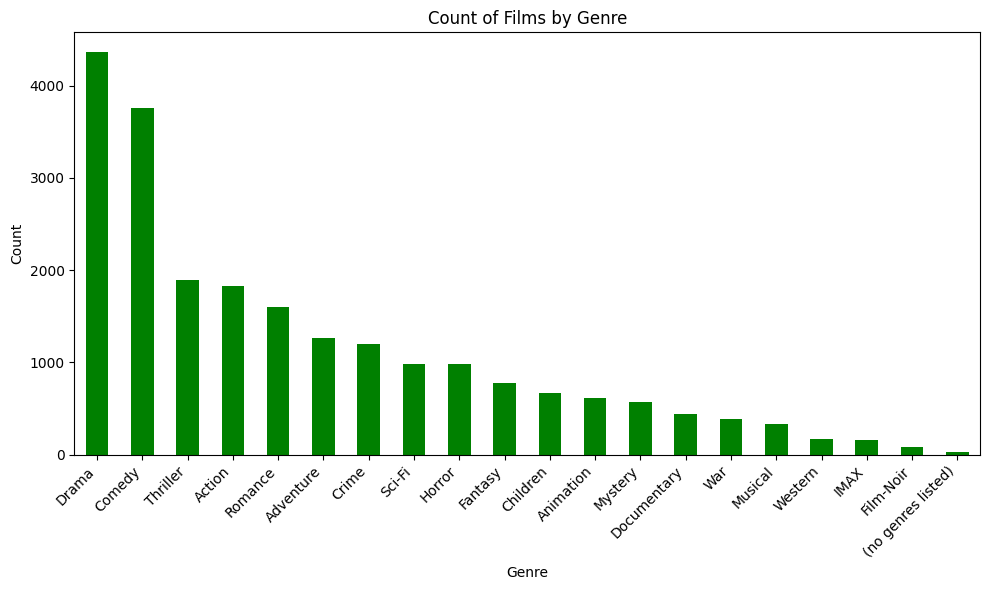

In [11]:
# Create a list to hold all genres
all_genres = []

# Iterate through each row of the DataFrame and append each genre to the list
for genres_list in ML['genres']:
    all_genres.extend(genres_list)

# Create a pandas Series from the list of all genres and count occurrences of each genre
genre_counts = pd.Series(all_genres).value_counts()

# Plotting the count of each genre
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='green')
plt.title('Count of Films by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


We see that the most predominant genres are `Drama`, `Comedy` and `Thriller`, but the first two show a bigger predominance.

We will repeat a similar process for the years the movies where released on. 

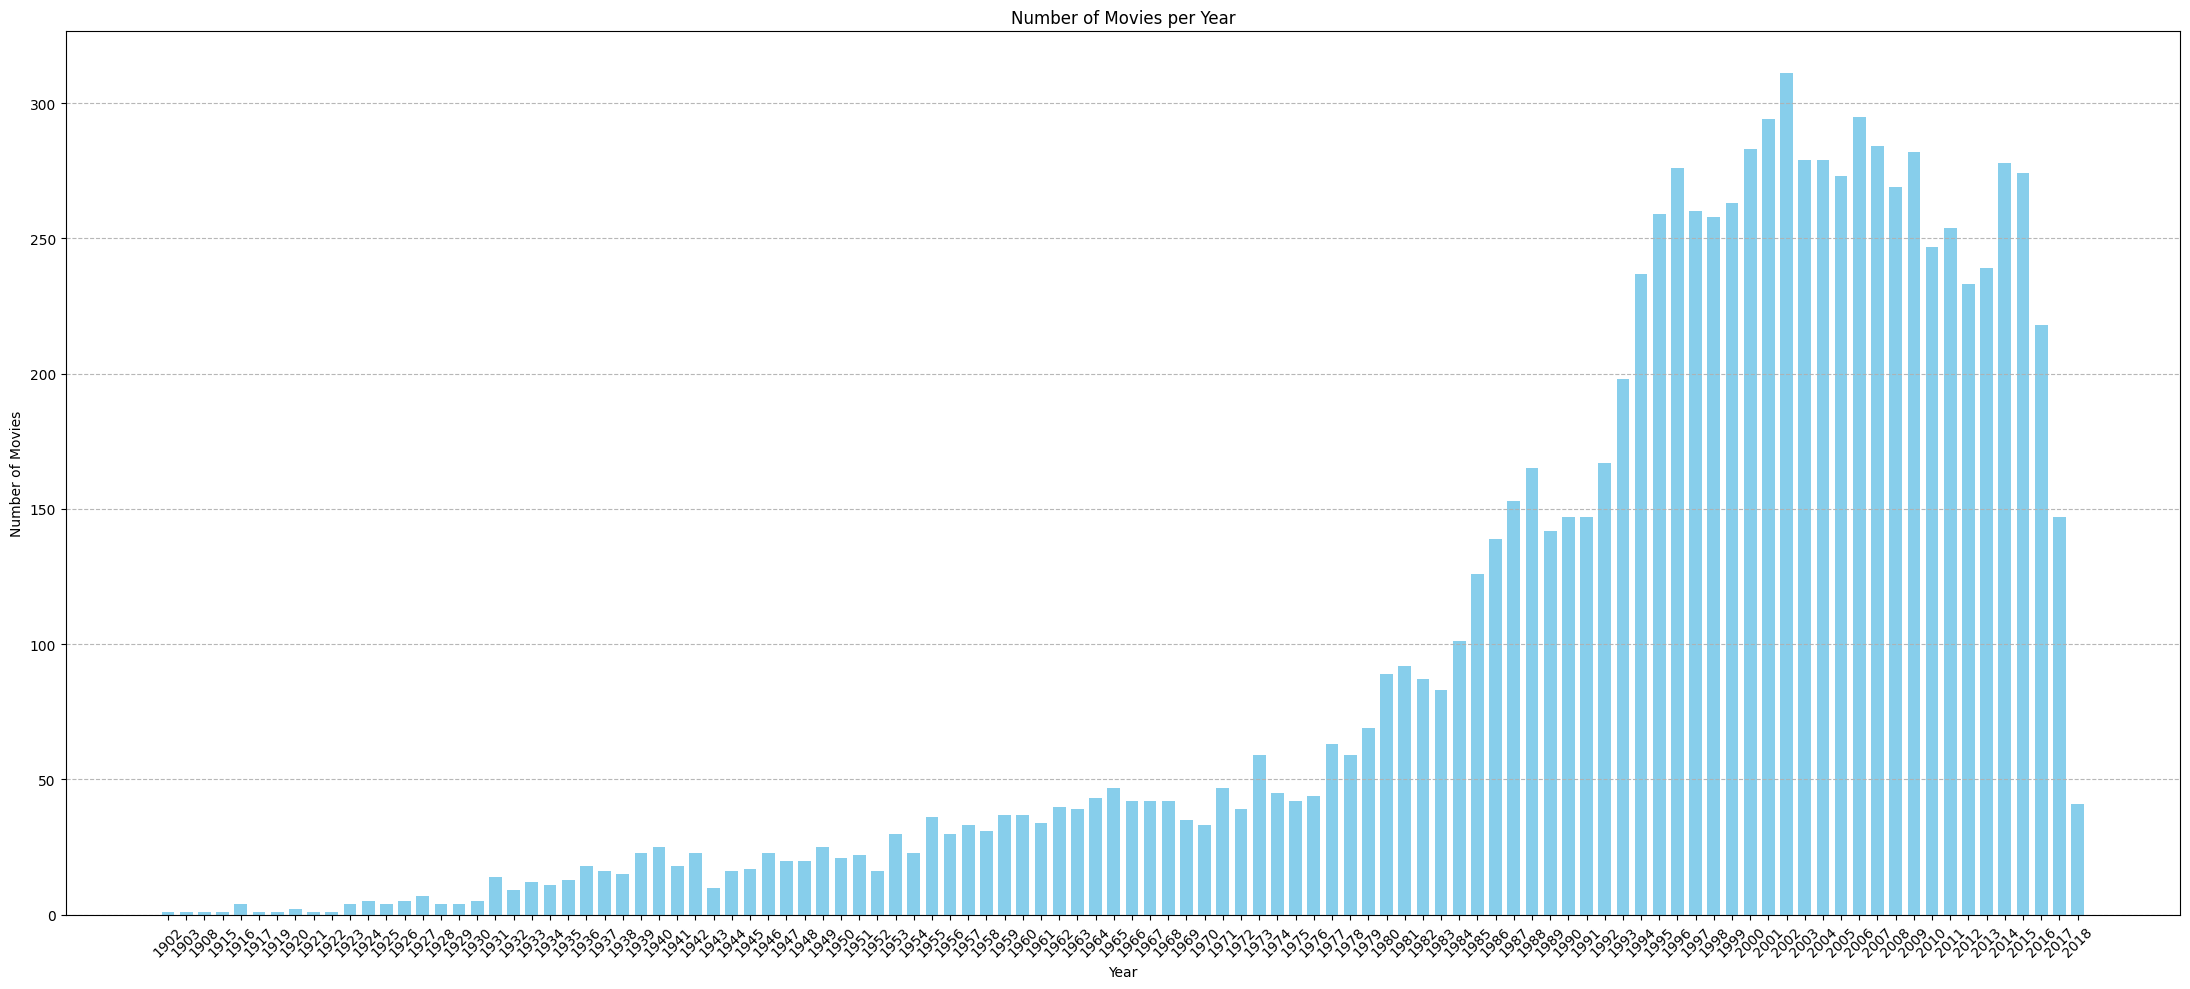

In [12]:
# Counting the number of movies per year
movies_per_year = ML['year'].value_counts().sort_index()

# Plotting the count of movies per year with increased separation
plt.figure(figsize=(22, 10))
bar_width = 0.7  # Adjust the width of each bar
plt.bar(movies_per_year.index, movies_per_year.values, color='skyblue', width=bar_width, align='center')

plt.title('Number of Movies per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')

# Adjust x-ticks positions for better readability
plt.xticks(movies_per_year.index, rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.tight_layout()
plt.show()


The release of the movies seems to be left-skeewed, showcasing that the biggest part of the movies in this dataset was released in recent years rather than in past decades such as the 70s or 80s.

We will now plot the distribution of the `imdbId` and `tmdbId` variables to see how they are distributed too.

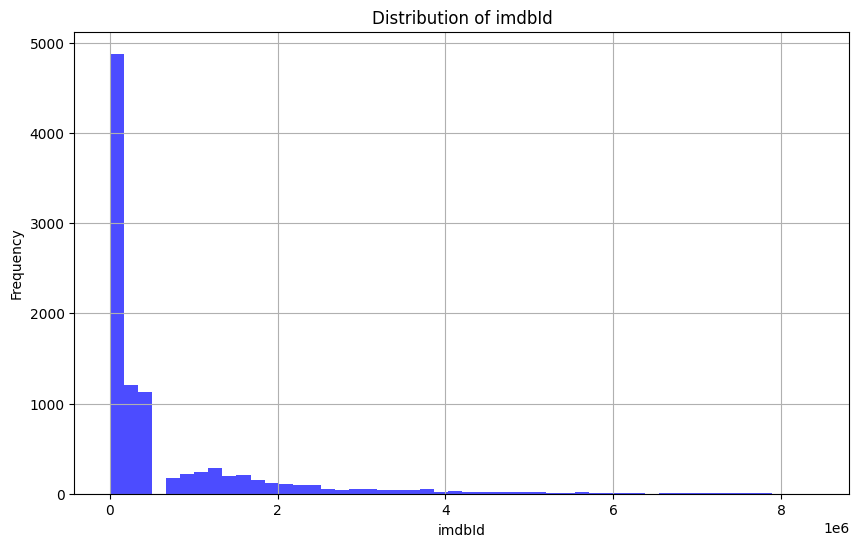

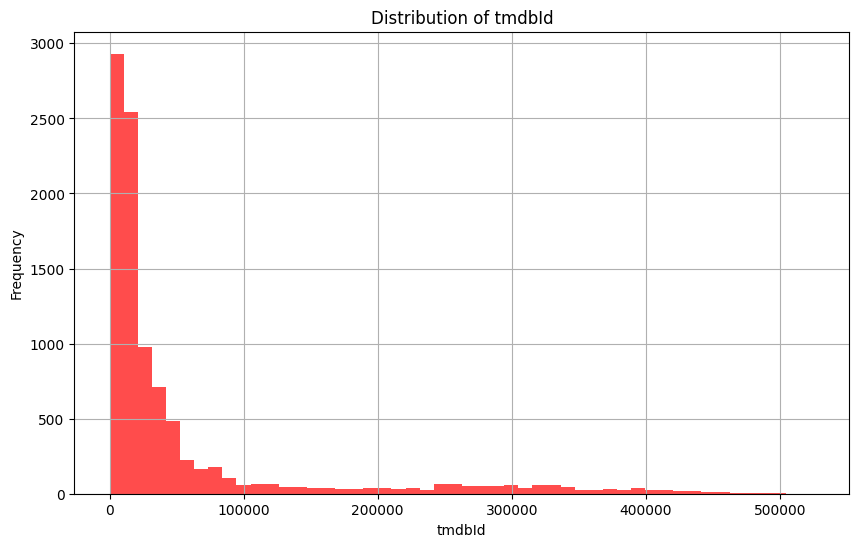

In [13]:
import matplotlib.pyplot as plt

# Plotting the distribution of imdbId
plt.figure(figsize=(10, 6))
plt.hist(ML['imdbId'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of imdbId')
plt.xlabel('imdbId')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting the distribution of tmdbId
plt.figure(figsize=(10, 6))
plt.hist(ML['tmdbId'], bins=50, color='red', alpha=0.7)
plt.title('Distribution of tmdbId')
plt.xlabel('tmdbId')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


The plots show the right skewed distributions of both the columns, showcasing that the highest frequency of appearance of the values is located in the early values of `imdbId` and `tmdbId`.

We also have to look into the `review_data`, each movie that is in the dataframe has all the reviews that have been done about them in the column `review_data`.

In [14]:
# Calculate the total number of reviews
total_reviews = sum(len(review_list) for review_list in ML['review_data'])

# Calculate the average number of reviews per movie
avg_reviews = total_reviews / ML['movieId'].nunique()

print("The average number of reviews per movie is: " , avg_reviews)
print("The total number of reviews is: ", total_reviews)
print("The number of unique movies is: ", ML['movieId'].nunique())


The average number of reviews per movie is:  10.560870457811538
The total number of reviews is:  102884
The number of unique movies is:  9742


We are going to check what movies are the most reviewed ones.

In [15]:
# Group the reviews DataFrame by movieId and count the number of reviews for each movie
reviews_count = reviews.groupby(['movieId', 'title']).size().reset_index(name='num_reviews')

# Sort the DataFrame by the number of reviews in descending order
reviews_count_sorted = reviews_count.sort_values(by='num_reviews', ascending=False)

# Select the top 10 movies with the most reviews
top_10_movies = reviews_count_sorted.head(10)

# Create a new DataFrame to store the top 10 movies with the most reviews
movie_reviews = pd.DataFrame(columns=['movieId', 'title', 'num_reviews'])

# Populate the movie_reviews DataFrame with the top 10 movies and their respective information
for index, row in top_10_movies.iterrows():
    movie_reviews = movie_reviews.append({'movieId': row['movieId'], 'title': row['title'], 'num_reviews': row['num_reviews']}, ignore_index=True)

# Display the movie_reviews DataFrame
movie_reviews


Looking at the numbers above we see that it is going to be difficult to plot data about the reviews since we have `9742` different movies and an average of more than `10` reviews per movie. However, we will plot the number of times each rating has been given to the movies to have an overview of the tendencies of the users when rating.

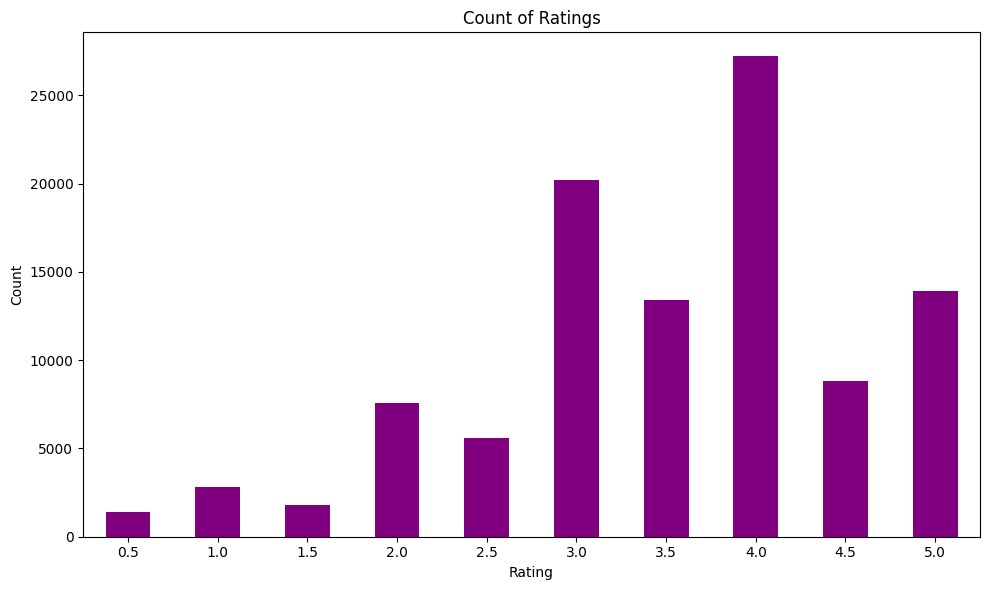

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a list to hold all ratings
all_ratings = []

# Iterate through each row of the DataFrame and append each rating to the list
for reviews_list in ML['review_data']:
    for review in reviews_list:
        all_ratings.append(review['rating'])
        
# Create a pandas Series from the list of all ratings and count occurrences of each rating
rating_counts = pd.Series(all_ratings).value_counts().sort_index()

# Plotting the count of each rating
plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color='purple')
plt.title('Count of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


We see that the most common rating to give is a `4`. This can mean that movies above average are the ones rated with this number, meaning that when we calculate ratings in the prediction models we might see a lot of `4s` since it is the most frequent rating.

We will also plot the average rating for each movie taking into account the number of reviews done for each of them.

<Figure size 1000x600 with 0 Axes>

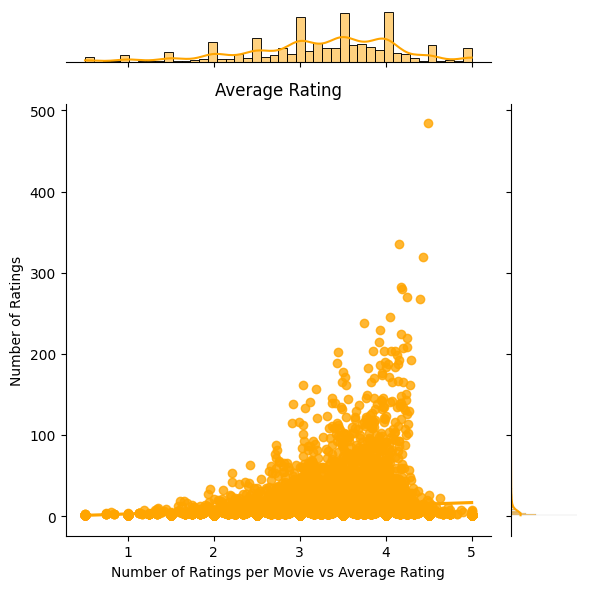

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming ML is your DataFrame containing movie ratings
# Assuming 'review_data' is the column containing the review dictionaries

# Calculate the number of ratings per movie
ML['num_ratings'] = ML['review_data'].apply(lambda x: len(x))

# Calculate the average rating per movie
def calculate_average_rating(reviews):
    if len(reviews) > 0:
        ratings = [review['rating'] for review in reviews if 'rating' in review and review['rating'] is not None]
        if ratings:
            return sum(ratings) / len(ratings)
    return None

ML['average_rating'] = ML['review_data'].apply(calculate_average_rating)

# Plotting the number of ratings per movie and the average ratings
plt.figure(figsize=(10, 6))
sns.jointplot(x='average_rating', y='num_ratings', data=ML, kind='reg', color='orange')
plt.title('Average Rating')
plt.xlabel('Number of Ratings per Movie vs Average Rating')
plt.ylabel('Number of Ratings')
plt.tight_layout()
plt.show()


This graph shows that the more ratings the movie has, the highest the average ratings is. Meaning that the movies that people like the most are the ones that have more reviews, this fact is good for the modelling part of the recommendation system, since it will mean that we will have more good reviews of the highest rated films and we will be able to give better recommnedations.

Now we will plot the years and months the reviews were created, showing in bar charts the number of reviews per year, and in the bars itself the number of reviews per month.

<Figure size 1700x600 with 0 Axes>

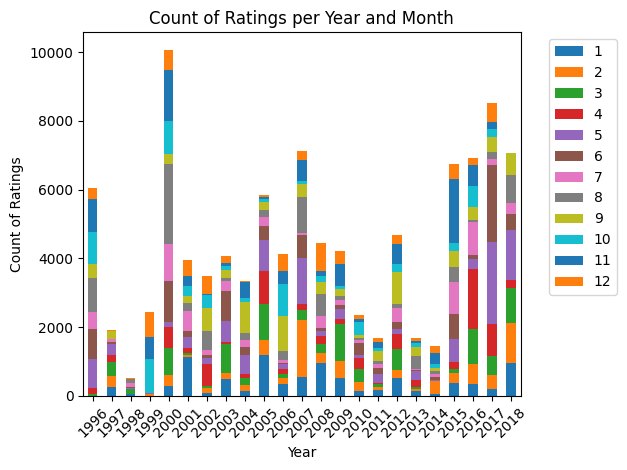

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Create lists to hold all years and months
all_years = []
all_months = []

# Iterate through each row of the DataFrame and extract year and month from the 'date' key of each dictionary
for reviews_list in ML['review_data']:
    for review in reviews_list:
        if review['date'] is not None:  # Check if 'date' is not None
            year_month = review['date'].strftime('%Y-%m')
            year, month = year_month.split('-')
            all_years.append(int(year))
            all_months.append(int(month))

# Create a pandas DataFrame from the lists of years and months
ratings_per_year_month = pd.DataFrame({'Year': all_years, 'Month': all_months})

# Plotting the count of ratings per year and month
plt.figure(figsize=(17, 6))
ratings_per_year_month.groupby(['Year', 'Month']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Count of Ratings per Year and Month')
plt.xlabel('Year')
plt.ylabel('Count of Ratings')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjusting legend position
plt.tight_layout()
plt.show()


We are going to check for the highest rated films in the full dataframe. First of all, we are going to check the top 10 highest rated films.

In [19]:
# Define a function to calculate the average rating for each movie
def calculate_average_rating(data):
    # Create an empty dictionary to store movie ratings
    movie_ratings = {}

    # Iterate through each row of the DataFrame and calculate the average rating for each movie
    for index, row in data.iterrows():
        movie_id = row['movieId']
        # Filter out None values from ratings
        ratings = [review['rating'] for review in row['review_data'] if review['rating'] is not None]
        # Calculate average rating if there are ratings present
        if ratings:
            average_rating = sum(ratings) / len(ratings)
            movie_ratings[movie_id] = average_rating

    # Sort the movies based on their average ratings in descending order
    sorted_movies = sorted(movie_ratings.items(), key=lambda x: x[1], reverse=True)

    # Return the sorted movies
    return sorted_movies

# Calculate the average ratings for the entire ML DataFrame
sorted_movies_ml = calculate_average_rating(ML)

# Print the top 10 highest-rated films
print("Top 10 highest-rated films in ML DataFrame:")
for movie_id, rating in sorted_movies_ml[:10]:
    movie_title = ML[ML['movieId'] == movie_id]['title'].values[0]
    print(f"{movie_title}: {rating:.2f}")


Top 10 highest-rated films in ML DataFrame:
Lamerica : 5.00
Heidi Fleiss: Hollywood Madam : 5.00
Awfully Big Adventure, An : 5.00
Live Nude Girls : 5.00
In the Realm of the Senses (Ai no corrida) : 5.00
What Happened Was... : 5.00
Thin Line Between Love and Hate, A : 5.00
Denise Calls Up : 5.00
Supercop 2 (Project S) (Chao ji ji hua) : 5.00
Entertaining Angels: The Dorothy Day Story : 5.00


In [20]:
import datetime

def calculate_average_rating_per_month(data):
    # Create a dictionary to store ratings per month
    ratings_per_month = {}

    # Iterate through each row of the DataFrame and aggregate ratings by month
    for index, row in data.iterrows():
        for review in row['review_data']:
            if review['rating'] is not None:
                if isinstance(review['date'], str):
                    date = datetime.datetime.strptime(review['date'], '%Y-%m-%d')
                else:
                    date = review['date']
                month = date.strftime('%Y-%m')
                if month not in ratings_per_month:
                    ratings_per_month[month] = []
                ratings_per_month[month].append(review['rating'])

    # Calculate the average rating per month
    average_ratings_per_month = {}
    for month, ratings in ratings_per_month.items():
        if ratings:
            average_rating = sum(ratings) / len(ratings)
            average_ratings_per_month[month] = average_rating

    # Return the dictionary containing average ratings per month sorted by month
    return dict(sorted(average_ratings_per_month.items()))

# Calculate the average ratings per month for the entire ML DataFrame
average_ratings_per_month_ml = calculate_average_rating_per_month(ML)

# Print the average ratings per month sorted by month
for month, rating in average_ratings_per_month_ml.items():
    print(f"Month: {month}, Average Rating: {rating:.2f}")


Month: 1996-03, Average Rating: 3.98
Month: 1996-04, Average Rating: 3.74
Month: 1996-05, Average Rating: 3.51
Month: 1996-06, Average Rating: 3.54
Month: 1996-07, Average Rating: 3.70
Month: 1996-08, Average Rating: 3.46
Month: 1996-09, Average Rating: 3.17
Month: 1996-10, Average Rating: 3.37
Month: 1996-11, Average Rating: 3.73
Month: 1996-12, Average Rating: 3.73
Month: 1997-01, Average Rating: 3.50
Month: 1997-02, Average Rating: 3.77
Month: 1997-03, Average Rating: 3.91
Month: 1997-04, Average Rating: 3.69
Month: 1997-05, Average Rating: 3.72
Month: 1997-06, Average Rating: 4.62
Month: 1997-07, Average Rating: 3.61
Month: 1997-09, Average Rating: 3.36
Month: 1997-10, Average Rating: 4.00
Month: 1997-11, Average Rating: 4.00
Month: 1997-12, Average Rating: 3.79
Month: 1998-01, Average Rating: 3.11
Month: 1998-02, Average Rating: 4.00
Month: 1998-03, Average Rating: 3.95
Month: 1998-05, Average Rating: 3.12
Month: 1998-06, Average Rating: 4.30
Month: 1998-07, Average Rating: 2.89
M

## Feature Engeneering

For the feature engeneering part we will only do the unpacking of the reviews dictionaries, because as they are, it is going to be very difficult to use the reviews if we don't do so, and also, after the hypothesis testing done about the dataset, we will `One-Hot-Encode` the genres to have them in separate columns.

We will do an unpacking of the dictionaries created in `joining.ipynb`.

In [21]:
# We will unpack the data in the review_data column
# We will create a new dataframe with the unpacked data
# We will also add the movieId and title to the new dataframe
# We will also add the year to the new dataframe
# We will also add the genres to the new dataframe

# Create an empty list to store dictionaries
unpacked_reviews_data = []

# Iterate through each row of the DataFrame and unpack the review_data
for index, row in ML.iterrows():
    for review in row['review_data']:
        unpacked_reviews_data.append({'movieId': row['movieId'], 'title': row['title'], 'year': row['year'], 'genres': row['genres'], 'userId': review['userId'], 'rating': review['rating'], 'date': review['date']})

# Convert the list of dictionaries into a DataFrame
unpacked_reviews_df = pd.DataFrame(unpacked_reviews_data)

# Print the first few rows of the DataFrame
print(unpacked_reviews_df.head())

   movieId       title  year  \
0        1  Toy Story   1995   
1        1  Toy Story   1995   
2        1  Toy Story   1995   
3        1  Toy Story   1995   
4        1  Toy Story   1995   

                                              genres  userId  rating  \
0  [Adventure, Animation, Children, Comedy, Fantasy]       1     4.0   
1  [Adventure, Animation, Children, Comedy, Fantasy]       5     4.0   
2  [Adventure, Animation, Children, Comedy, Fantasy]       7     4.5   
3  [Adventure, Animation, Children, Comedy, Fantasy]      15     2.5   
4  [Adventure, Animation, Children, Comedy, Fantasy]      17     4.5   

         date  
0  2000-07-30  
1  1996-11-08  
2  2005-01-25  
3  2017-11-13  
4  2011-05-18  


We are now going to check for ``NaN`` values in the recently created columns. We will have to handle them somehow since ``NaN`` values don't give as much explicit feedback for out modelling.

In [22]:
# We check if there are NaN values in the dataframe where we print the percentages of NaN values
check_nan(unpacked_reviews_df)

# We print a row that contains NaN values
unpacked_reviews_df[unpacked_reviews_df.isna().any(axis=1)]

# We drop the NaN values
unpacked_reviews_df = unpacked_reviews_df.dropna()


year      0.000194
rating    0.002012
date      0.002012
dtype: float64
        movieId                        title  year  \
2005         40    Cry, the Beloved Country   1995   
2006         40    Cry, the Beloved Country   1995   
4424        153              Batman Forever   1995   
6656        248                  Houseguest   1994   
6657        248                  Houseguest   1994   
...         ...                          ...   ...   
102446   171495                               None   
102447   171631            Maria Bamford: Ol  None   
102450   171749  Death Note: Desu nôto (2006  None   
102467   171891                  Generation   None   
102635   176601                       Black   None   

                                    genres  userId  rating        date  
2005                               [Drama]     474     NaN        None  
2006                               [Drama]     474     NaN        None  
4424    [Action, Adventure, Comedy, Crime]     336     NaN  

## Hypothesis testing

### ANOVA Test for ratings between months:

We are going to check wether there are differences between average ratings and different months of the year. We will try performing an ``ANOVA`` test to check whether there are differences between the means of the different groups compared.


In [23]:
import pandas as pd
from scipy.stats import f_oneway

# Convert 'date' column to datetime
unpacked_reviews_df['date'] = pd.to_datetime(unpacked_reviews_df['date'])

# Extract month from the 'date' column
unpacked_reviews_df['month'] = unpacked_reviews_df['date'].dt.month

# Perform ANOVA
result = f_oneway(*(group['rating'] for name, group in unpacked_reviews_df.groupby('month')))

# Print ANOVA result
print("ANOVA F-statistic:", result.statistic)
print("ANOVA p-value:", result.pvalue)

# Interpretation of ANOVA result
alpha = 0.05  # Significance level (95% confidence level)

if result.pvalue < alpha:
    print("The p-value of", result.pvalue, "indicates that there is a statistically significant difference in ratings between different months at a 95% confidence level. Therefore, we reject the null hypothesis.")
else:
    print("The p-value of", result.pvalue, "suggests that there is insufficient evidence to conclude that there are differences in ratings between different months at a 95% confidence level. Therefore, we fail to reject the null hypothesis.")


ANOVA F-statistic: 72.3899982196564
ANOVA p-value: 5.325189711017257e-163
The p-value of 5.325189711017257e-163 indicates that there is a statistically significant difference in ratings between different months at a 95% confidence level. Therefore, we reject the null hypothesis.


After the ``ANOVA``, we have to check for the assumptions to see if the results can be relied.

1. Normality: The residuals (differences between observed and predicted values) should be normally distributed.
2. Homogeneity of Variance: The variances of the residuals should be approximately equal across groups.

Normality Assumption:

You can visually inspect the distribution of residuals using a ``Q-Q plot`` or a ``histogram`` and conduct a normality test.

The 'month' column contains NaN values: False
ANOVA F-statistic: 72.3899982196564
ANOVA p-value: 5.325189711017257e-163
The p-value of 5.325189711017257e-163 indicates that there is a statistically significant difference in ratings between different months at a 95% confidence level. Therefore, we reject the null hypothesis.

Shapiro-Wilk test statistic: 0.9605224911711492
Shapiro-Wilk p-value: 8.969751951594802e-89
The p-value of 8.969751951594802e-89 indicates that the residuals are not normally distributed. Therefore, the normality assumption is violated.


C:\Users\Jaume\AppData\Local\Temp\ipykernel_7540\3133927088.py:47: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 102657.
  shapiro_test_statistic, shapiro_p_value = shapiro(all_residuals)


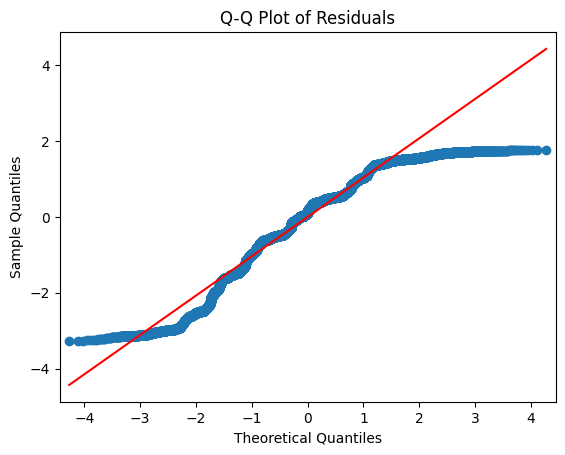

In [24]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway, shapiro
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'unpacked_reviews_df'
# Convert 'date' column to datetime
unpacked_reviews_df['date'] = pd.to_datetime(unpacked_reviews_df['date'])

# Extract month from the 'date' column
unpacked_reviews_df['month'] = unpacked_reviews_df['date'].dt.month

# Check for NaN values in the 'month' column
nan_values = unpacked_reviews_df['month'].isna().any()

print("The 'month' column contains NaN values:", nan_values)

if nan_values:
    print("Error: 'month' column contains NaN values. Please handle them before fitting the regression model.")
else:
    # Perform ANOVA
    result = f_oneway(*(group['rating'] for name, group in unpacked_reviews_df.groupby('month')))

    # Print ANOVA result
    print("ANOVA F-statistic:", result.statistic)
    print("ANOVA p-value:", result.pvalue)

    # Interpretation of ANOVA result
    alpha = 0.05  # Significance level (95% confidence level)

    if result.pvalue < alpha:
        print("The p-value of", result.pvalue, "indicates that there is a statistically significant difference in ratings between different months at a 95% confidence level. Therefore, we reject the null hypothesis.")
    else:
        print("The p-value of", result.pvalue, "suggests that there is insufficient evidence to conclude that there are differences in ratings between different months at a 95% confidence level. Therefore, we fail to reject the null hypothesis.")

    # Combine all residuals into a single array
    all_residuals = []
    for month, group in unpacked_reviews_df.groupby('month'):
        model = sm.OLS(group['rating'], sm.add_constant(group.index)).fit()
        all_residuals.extend(model.resid)

    # Convert residuals to a NumPy array
    all_residuals = np.array(all_residuals)

    # Perform Shapiro-Wilk test for normality on all residuals
    shapiro_test_statistic, shapiro_p_value = shapiro(all_residuals)

    # Print normality test result
    print("\nShapiro-Wilk test statistic:", shapiro_test_statistic)
    print("Shapiro-Wilk p-value:", shapiro_p_value)

    # Interpretation of normality test result
    if shapiro_p_value < alpha:
        print("The p-value of", shapiro_p_value, "indicates that the residuals are not normally distributed. Therefore, the normality assumption is violated.")
    else:
        print("The p-value of", shapiro_p_value, "suggests that the residuals are normally distributed. Therefore, the normality assumption is met.")

    # Plot Q-Q plot for all residuals
    sm.qqplot(all_residuals, line='s')
    plt.title('Q-Q Plot of Residuals')
    plt.show()


This graph shows that the normality assumptions of the residuals is not fulfilled, so we can't accept the ``ANOVA`` results. After checking the homogeneity of the Variance, we will do the ``Kruskal-Wallis`` test.

Homogeneity of Variance Assumption:

You can visually inspect the spread of residuals across groups using boxplots and conduct a statistical test like Levene's test for homogeneity of variances.

The 'month' column contains NaN values: False
Levene's test statistic: 44.17411448563083
Levene's test p-value: 5.607877607946675e-97
The p-value of 5.607877607946675e-97 indicates that the variances across groups are significantly different. Therefore, the homogeneity of variance assumption is violated.


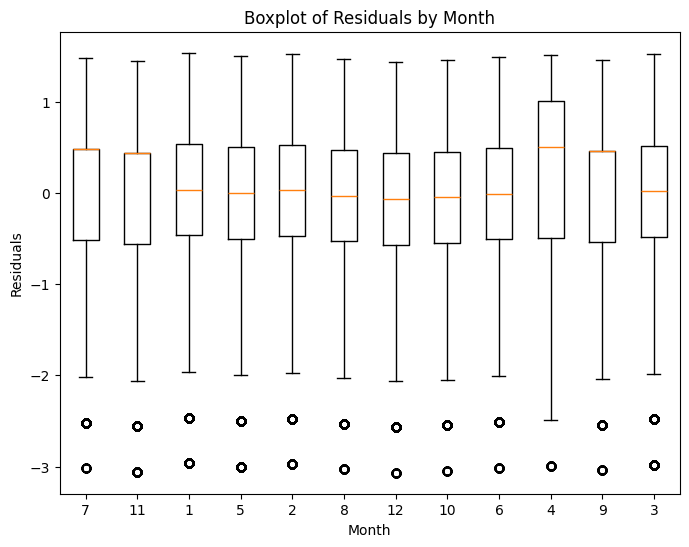

In [25]:
import pandas as pd
from scipy.stats import f_oneway, shapiro, levene
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'unpacked_reviews_df'
# Convert 'date' column to datetime
unpacked_reviews_df['date'] = pd.to_datetime(unpacked_reviews_df['date'])

# Extract month from the 'date' column
unpacked_reviews_df['month'] = unpacked_reviews_df['date'].dt.month

# Check for NaN values in the 'month' column
nan_values = unpacked_reviews_df['month'].isna().any()

print("The 'month' column contains NaN values:", nan_values)

if nan_values:
    print("Error: 'month' column contains NaN values. Please handle them before fitting the regression model.")
else:
    # Extract residuals
    model = sm.OLS(unpacked_reviews_df['rating'], sm.add_constant(unpacked_reviews_df['month'])).fit()
    residuals = model.resid

    # Perform Levene's test for homogeneity of variances
    levene_test_statistic, levene_p_value = levene(*[residuals[unpacked_reviews_df['month'] == month] for month in unpacked_reviews_df['month'].unique()])

    # Print Levene's test result
    print("Levene's test statistic:", levene_test_statistic)
    print("Levene's test p-value:", levene_p_value)

    # Interpretation of Levene's test result
    alpha = 0.05  # Significance level (95% confidence level)

    if levene_p_value < alpha:
        print("The p-value of", levene_p_value, "indicates that the variances across groups are significantly different. Therefore, the homogeneity of variance assumption is violated.")
    else:
        print("The p-value of", levene_p_value, "suggests that the variances across groups are not significantly different. Therefore, the homogeneity of variance assumption is met.")
        
    # Visualize spread of residuals across groups using boxplot
    plt.figure(figsize=(8, 6))
    plt.title('Boxplot of Residuals by Month')
    plt.xlabel('Month')
    plt.ylabel('Residuals')
    plt.boxplot([residuals[unpacked_reviews_df['month'] == month] for month in unpacked_reviews_df['month'].unique()], labels=unpacked_reviews_df['month'].unique())
    plt.show()


### Kruskal-Wallis

We will perform this test since we can't trust the results from the ``ANOVA`` after checking the assumptions and seeing that they aren't fulfilled.

In [26]:
import pandas as pd
from scipy.stats import kruskal, shapiro, levene
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'unpacked_reviews_df'
# Convert 'date' column to datetime
unpacked_reviews_df['date'] = pd.to_datetime(unpacked_reviews_df['date'])

# Extract month from the 'date' column
unpacked_reviews_df['month'] = unpacked_reviews_df['date'].dt.month

# Check for NaN values in the 'month' column
nan_values = unpacked_reviews_df['month'].isna().any()

print("The 'month' column contains NaN values:", nan_values)

if nan_values:
    print("Error: 'month' column contains NaN values. Please handle them before fitting the regression model.")
else:
    # Perform Kruskal-Wallis test
    kruskal_result = kruskal(*(group['rating'] for name, group in unpacked_reviews_df.groupby('month')))

    # Print Kruskal-Wallis test result
    print("Kruskal-Wallis test statistic:", kruskal_result.statistic)
    print("Kruskal-Wallis p-value:", kruskal_result.pvalue)

    # Interpretation of Kruskal-Wallis test result
    alpha = 0.05  # Significance level (95% confidence level)

    if kruskal_result.pvalue < alpha:
        print("The p-value of", kruskal_result.pvalue, "indicates that there are statistically significant differences between the groups.")
    else:
        print("The p-value of", kruskal_result.pvalue, "suggests that there are no statistically significant differences between the groups.")


The 'month' column contains NaN values: False
Kruskal-Wallis test statistic: 801.8398923490347
Kruskal-Wallis p-value: 7.629080584458625e-165
The p-value of 7.629080584458625e-165 indicates that there are statistically significant differences between the groups.


### ANOVA test for differences between genres

Now, since we also have the genres per movie, we will also check if there are differences between the ratings across different genres using a one-way ``ANOVA`` test. This will help us understand if there are statistically significant variations in ratings based on the genres of the movies.

To perform this analysis, we can group the ratings by genre and then apply the one-way ``ANOVA`` test to assess whether there are significant differences in ratings among the different genres. This additional analysis will provide valuable insights into how movie genres may influence audience ratings.

In [27]:
# Explode the dataframe based on genres
exploded_df = unpacked_reviews_df.explode('genres')

exploded_df


,movieId,title,year,genres,userId,rating,date,month
0,1,Toy Story,1995,Adventure,1,4.0,2000-07-30,7
0,1,Toy Story,1995,Animation,1,4.0,2000-07-30,7
0,1,Toy Story,1995,Children,1,4.0,2000-07-30,7
0,1,Toy Story,1995,Comedy,1,4.0,2000-07-30,7
0,1,Toy Story,1995,Fantasy,1,4.0,2000-07-30,7
...,...,...,...,...,...,...,...,...
102880,193583,No Game No Life: Zero,2017,Fantasy,184,3.5,2018-09-16,9
102881,193585,Flint,2017,Drama,184,3.5,2018-09-16,9
102882,193587,Bungo Stray Dogs: Dead Apple,2018,Action,184,3.5,2018-09-16,9
102882,193587,Bungo Stray Dogs: Dead Apple,2018,Animation,184,3.5,2018-09-16,9


In [28]:
import pandas as pd
from scipy.stats import f_oneway

# Perform ANOVA
result = f_oneway(*(group['rating'] for name, group in exploded_df.groupby('genres')))
# Print ANOVA result
print("ANOVA F-statistic:", result.statistic)
print("ANOVA p-value:", result.pvalue)

# Interpretation of ANOVA result
alpha = 0.05  # Significance level (95% confidence level)

if result.pvalue < alpha:
    print("The p-value of", result.pvalue, "indicates that there is a statistically significant difference in ratings between different genres at a 95% confidence level. Therefore, we reject the null hypothesis.")
else:
    print("The p-value of", result.pvalue, "suggests that there is insufficient evidence to conclude that there are differences in ratings between different genres at a 95% confidence level. Therefore, we fail to reject the null hypothesis.")



ANOVA F-statistic: 184.87230503463513
ANOVA p-value: 0.0
The p-value of 0.0 indicates that there is a statistically significant difference in ratings between different genres at a 95% confidence level. Therefore, we reject the null hypothesis.


After getting the ANOVA results we have to check for the assumptions to see that the values that we got are reliable.

1. Normality: The residuals should be normally distributed.
2. Homogeneity of Variance: The variances of the residuals should be approximately equal across groups.


Normality Assumption:

You can visually inspect the distribution of residuals using a Q-Q plot or a histogram and conduct a normality test.

ANOVA F-statistic: 184.87230503463513
ANOVA p-value: 0.0
The p-value of 0.0 indicates that there is a statistically significant difference in ratings between different genres at a 95% confidence level. Therefore, we reject the null hypothesis.


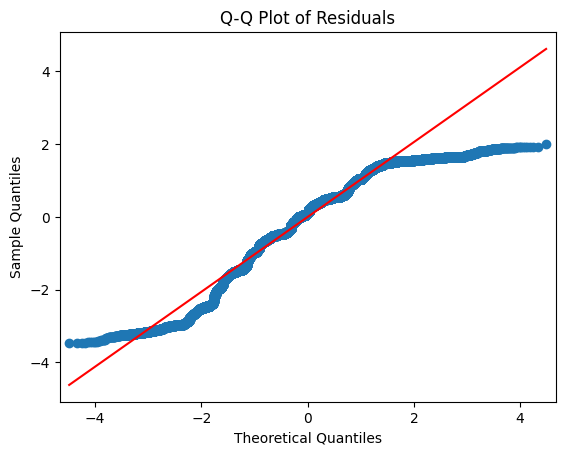


Shapiro-Wilk test statistic: 0.9609360438597571
Shapiro-Wilk p-value: 1.1134706157339241e-106
The p-value of 1.1134706157339241e-106 indicates that the residuals are not normally distributed. Therefore, the normality assumption is violated.


C:\Users\Jaume\AppData\Local\Temp\ipykernel_7540\164478726.py:37: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 279928.
  shapiro_test_statistic, shapiro_p_value = shapiro(all_residuals)


In [29]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway, shapiro
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Perform ANOVA
result = f_oneway(*(group['rating'] for name, group in exploded_df.groupby('genres')))

# Print ANOVA result
print("ANOVA F-statistic:", result.statistic)
print("ANOVA p-value:", result.pvalue)

# Interpretation of ANOVA result
alpha = 0.05  # Significance level (95% confidence level)

if result.pvalue < alpha:
    print("The p-value of", result.pvalue, "indicates that there is a statistically significant difference in ratings between different genres at a 95% confidence level. Therefore, we reject the null hypothesis.")
else:
    print("The p-value of", result.pvalue, "suggests that there is insufficient evidence to conclude that there are differences in ratings between different genres at a 95% confidence level. Therefore, we fail to reject the null hypothesis.")

# Combine all residuals into a single array
all_residuals = []
for name, group in exploded_df.groupby('genres'):
    model = sm.OLS(group['rating'], sm.add_constant(group.index)).fit()
    all_residuals.extend(model.resid)

# Convert residuals to a NumPy array
all_residuals = np.array(all_residuals)

# Plot Q-Q plot for all residuals
sm.qqplot(all_residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Perform Shapiro-Wilk test for normality on all residuals
shapiro_test_statistic, shapiro_p_value = shapiro(all_residuals)

# Print normality test result
print("\nShapiro-Wilk test statistic:", shapiro_test_statistic)
print("Shapiro-Wilk p-value:", shapiro_p_value)

# Interpretation of normality test result
if shapiro_p_value < alpha:
    print("The p-value of", shapiro_p_value, "indicates that the residuals are not normally distributed. Therefore, the normality assumption is violated.")
else:
    print("The p-value of", shapiro_p_value, "suggests that the residuals are normally distributed. Therefore, the normality assumption is met.")


Homogeneity of Variance Assumption:

You can visually inspect the spread of residuals across groups using boxplots and conduct a statistical test like Levene's test for homogeneity of variances.

ANOVA F-statistic: 184.87230503463513
ANOVA p-value: 0.0
The p-value of 0.0 indicates that there is a statistically significant difference in ratings between different genres at a 95% confidence level. Therefore, we reject the null hypothesis.
Levene's test statistic: 66.89165426552019
Levene's test p-value: 2.4109079008460915e-257
The p-value of 2.4109079008460915e-257 indicates that the variances across genres are significantly different. Therefore, the homogeneity of variance assumption is violated.


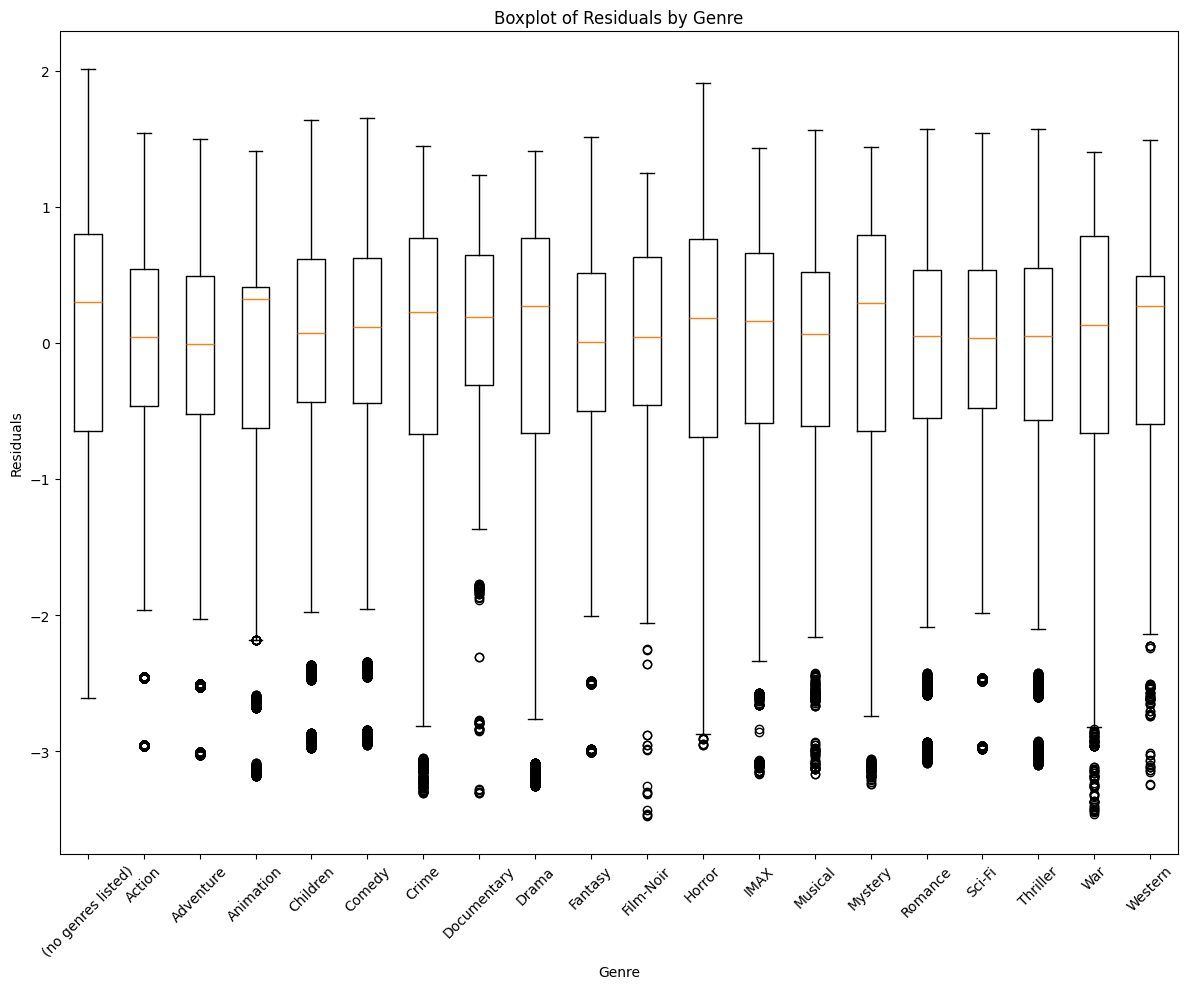

In [30]:
import pandas as pd
from scipy.stats import f_oneway, shapiro, levene
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Perform ANOVA
result = f_oneway(*(group['rating'] for name, group in exploded_df.groupby('genres')))

# Print ANOVA result
print("ANOVA F-statistic:", result.statistic)
print("ANOVA p-value:", result.pvalue)

# Interpretation of ANOVA result
alpha = 0.05  # Significance level (95% confidence level)

if result.pvalue < alpha:
    print("The p-value of", result.pvalue, "indicates that there is a statistically significant difference in ratings between different genres at a 95% confidence level. Therefore, we reject the null hypothesis.")
else:
    print("The p-value of", result.pvalue, "suggests that there is insufficient evidence to conclude that there are differences in ratings between different genres at a 95% confidence level. Therefore, we fail to reject the null hypothesis.")

# Compute residuals for each genre
residuals_by_genre = {}
for name, group in exploded_df.groupby('genres'):
    model = sm.OLS(group['rating'], sm.add_constant(group.index)).fit()
    residuals_by_genre[name] = model.resid

# Perform Levene's test for homogeneity of variances
levene_test_statistic, levene_p_value = levene(*list(residuals_by_genre.values()))

# Print Levene's test result
print("Levene's test statistic:", levene_test_statistic)
print("Levene's test p-value:", levene_p_value)

# Interpretation of Levene's test result
if levene_p_value < alpha:
    print("The p-value of", levene_p_value, "indicates that the variances across genres are significantly different. Therefore, the homogeneity of variance assumption is violated.")
else:
    print("The p-value of", levene_p_value, "suggests that the variances across genres are not significantly different. Therefore, the homogeneity of variance assumption is met.")

# Visualize spread of residuals across genres using boxplot
plt.figure(figsize=(12, 10))
plt.title('Boxplot of Residuals by Genre')
plt.xlabel('Genre')
plt.ylabel('Residuals')
plt.boxplot(list(residuals_by_genre.values()), labels=list(residuals_by_genre.keys()))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


We will perform this test since we can't trust the results from the ``ANOVA`` after checking the assumptions and seeing that they aren't fulfilled.

### Kruskal-Wallis

We will perform this test since we can't trust the results from the ``ANOVA`` after checking the assumptions and seeing that they aren't fulfilled.

In [31]:
from scipy.stats import kruskal

# Extract ratings for each genre
genre_ratings = [group['rating'].values for name, group in exploded_df.groupby('genres')]

# Perform Kruskal-Wallis test
kw_statistic, kw_p_value = kruskal(*genre_ratings)

# Print Kruskal-Wallis test result
print("Kruskal-Wallis H-statistic:", kw_statistic)
print("Kruskal-Wallis p-value:", kw_p_value)

# Interpretation of Kruskal-Wallis test result
alpha = 0.05  # Significance level (95% confidence level)

if kw_p_value < alpha:
    print("The p-value of", kw_p_value, "indicates that there is a statistically significant difference in ratings between different genres. Therefore, we reject the null hypothesis.")
else:
    print("The p-value of", kw_p_value, "suggests that there is insufficient evidence to conclude that there are differences in ratings between different genres. Therefore, we fail to reject the null hypothesis.")


Kruskal-Wallis H-statistic: 3458.0338377841344
Kruskal-Wallis p-value: 0.0
The p-value of 0.0 indicates that there is a statistically significant difference in ratings between different genres. Therefore, we reject the null hypothesis.


In [32]:
# We print the size of the unpacked_reviews_df dataframe
print(unpacked_reviews_df.shape)

(102657, 8)


After doing the hypothesis analysis we find convenient to encode the genres since we have them in a list in the same column, we will `one-hot-encode` the genres to have 0s and 1s for each genre depending on if the movie has them or not. This will be potentially helpful for the modelling part, if we decide to take into account the genres for the modelling.

In [33]:
# Create new columns for each unique genre
unique_genres = unpacked_reviews_df['genres'].explode().unique()

for genre in unique_genres:
    unpacked_reviews_df[genre] = unpacked_reviews_df['genres'].apply(lambda x: 1 if genre in x else 0)

# Drop the original 'genres' column
unpacked_reviews_df = unpacked_reviews_df.drop(columns=['genres'])

# Print the updated DataFrame
print(unpacked_reviews_df.head())

   movieId       title  year  userId  rating       date  month  Adventure  \
0        1  Toy Story   1995       1     4.0 2000-07-30      7          1   
1        1  Toy Story   1995       5     4.0 1996-11-08     11          1   
2        1  Toy Story   1995       7     4.5 2005-01-25      1          1   
3        1  Toy Story   1995      15     2.5 2017-11-13     11          1   
4        1  Toy Story   1995      17     4.5 2011-05-18      5          1   

   Animation  Children  ...  Horror  Mystery  Sci-Fi  War  Musical  \
0          1         1  ...       0        0       0    0        0   
1          1         1  ...       0        0       0    0        0   
2          1         1  ...       0        0       0    0        0   
3          1         1  ...       0        0       0    0        0   
4          1         1  ...       0        0       0    0        0   

   Documentary  IMAX  Western  Film-Noir  (no genres listed)  
0            0     0        0          0             

Last but not least, we export the final version of the full file as a parquet file since it is more memory efficient when loading.

In [34]:
# We export the file as a parquet
unpacked_reviews_df.to_parquet('cleaned/unpacked_reviews_df_100k.parquet')